In [2]:
import kaggle

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()
api.competition_download_file('time-series-classification-part-1','ETTh1_without_missing.csv')

ETTh1_without_missing.csv: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import csv
def partionnage(chemin):
    row=[]
    with open(chemin, 'r') as file:
        i=0
        reader = csv.reader(file, delimiter=';')
        new_row={}
        for row in reader:
            if(i!=0):
                temp_dic={}
                temp_dic["jour"]=(row[0].split(","))[1].split(" ")[0]
                temp_dic["heure"]=int((row[0].split(","))[1].split(" ")[1].split(":")[0])
                temp_dic["OT"]=float((row[0].split(","))[2])
                new_row[(row[0].split(","))[0]]=temp_dic
            i=i+1
        return new_row
    

data=partionnage('ETTh1_without_missing.csv')
print(data)


{'0': {'jour': '2016-07-01', 'heure': 0, 'OT': 30.5310001373291}, '1': {'jour': '2016-07-01', 'heure': 1, 'OT': 27.78700065612793}, '2': {'jour': '2016-07-01', 'heure': 2, 'OT': 27.78700065612793}, '3': {'jour': '2016-07-01', 'heure': 3, 'OT': 25.04400062561035}, '4': {'jour': '2016-07-01', 'heure': 4, 'OT': 21.947999954223643}, '5': {'jour': '2016-07-01', 'heure': 5, 'OT': 21.17399978637696}, '6': {'jour': '2016-07-01', 'heure': 6, 'OT': 22.79199981689453}, '7': {'jour': '2016-07-01', 'heure': 7, 'OT': 23.143999099731445}, '8': {'jour': '2016-07-01', 'heure': 8, 'OT': 21.66699981689453}, '9': {'jour': '2016-07-01', 'heure': 9, 'OT': 17.445999145507812}, '10': {'jour': '2016-07-01', 'heure': 10, 'OT': 19.97900009155273}, '11': {'jour': '2016-07-01', 'heure': 11, 'OT': 20.11899948120117}, '12': {'jour': '2016-07-01', 'heure': 12, 'OT': 19.20499992370605}, '13': {'jour': '2016-07-01', 'heure': 13, 'OT': 18.57200050354004}, '14': {'jour': '2016-07-01', 'heure': 14, 'OT': 19.55599975585937

[12.901864274799658, 12.799548459102573, 12.74244737253625, 12.61843077722844, 12.51281994639011, 12.39460665524171, 12.350171728725249, 12.501405793255056, 12.761164810188589, 12.842419667876328, 13.190164832527287, 13.444547135372572, 13.603277028391236, 14.043875369503887, 14.638401640419154, 14.669612195105433, 14.751099867314803, 14.635890431981146, 14.242299590543967, 13.805061012506485, 13.503206688140864, 13.322135928186398, 13.189520116528591, 13.002502096881482]
ok


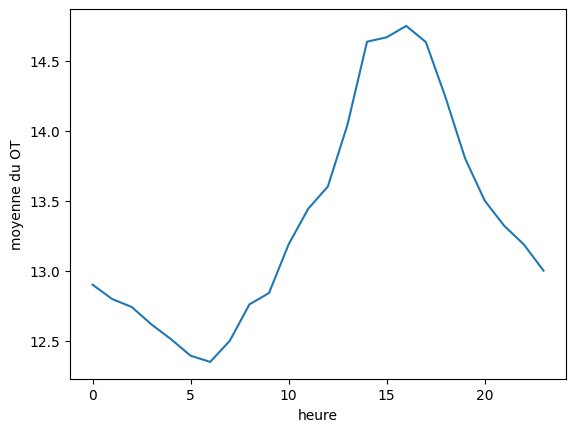

In [5]:
import matplotlib.pyplot as plt

def meanByHour(data):
    numberOfHours=[0 for i in range(0,24)]
    OTmean=[0 for i in range(0,24)]
    i=0
    for i,k in data.items():
        numberOfHours[k["heure"]]=numberOfHours[k["heure"]]+1
        OTmean[k["heure"]]=OTmean[k["heure"]]+k["OT"]    
    return [j / i for j, i in zip(OTmean, numberOfHours)]
    
print(meanByHour(data))         
print("ok")

meanByHour(data)
def graph(data):
    plt.plot([i for i in range(0,24)],meanByHour(data))
    plt.xlabel('heure')
    plt.ylabel('moyenne du OT')
    plt.show()
    
graph(data)
print("on remarque que l'écart type dans une même journée est faible presque negligable , se focaliser sur les journée ou les mois ")